# Feb 2nd, 2022 (Mouse ICA)

**Motivation**: Look at mouse ICA components.  <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Allen

In [2]:
from register.atlas import Allen
al = Allen()

In [3]:
from allensdk.core.reference_space_cache import ReferenceSpaceCache

reference_space_key = 'annotation/ccf_2017'
resolution = 10
rspc = ReferenceSpaceCache(resolution, reference_space_key, manifest='manifest.json')
rsp = rspc.get_reference_space()

In [4]:
# ID 1 is the adult mouse structure graph
tree = rspc.get_structure_tree(structure_graph_id=1)
acro_map = tree.value_map(lambda x: x['id'], lambda y: y['acronym'])
acro_map[315]

'Isocortex'

## Joannes

In [5]:
_dir = '/home/hadi/Documents/MouseICA'
file = 'DSURQE_100micron_DRICA.nii.gz'
file = pjoin(_dir, file)
img = ants.image_read(file)
x = img.numpy()
img

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (126, 191, 96, 18)
         Spacing    : (0.1, 0.1, 0.1, 1.0)
         Origin     : (6.27, 8.19, -4.2, 0.0)
         Direction  : [-1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

### Component 0

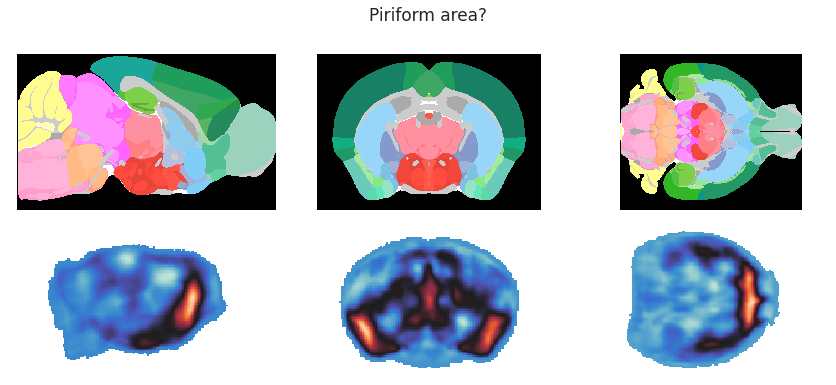

In [6]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 0
slices = [6000, 5000, 5000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Piriform area?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 1

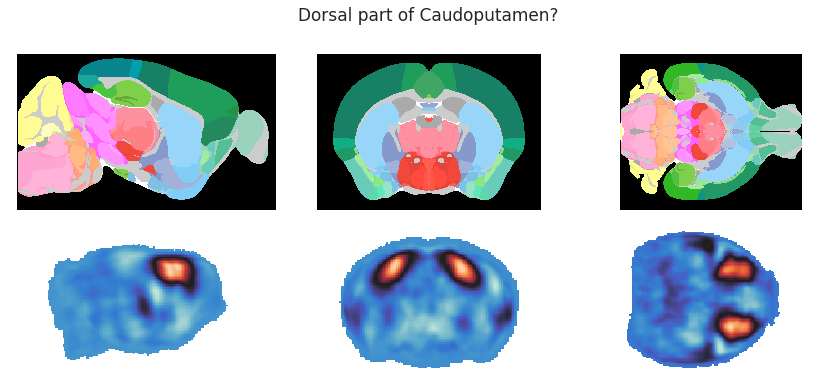

In [7]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 1
slices = [5900, 5000, 4000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Dorsal part of Caudoputamen?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 2

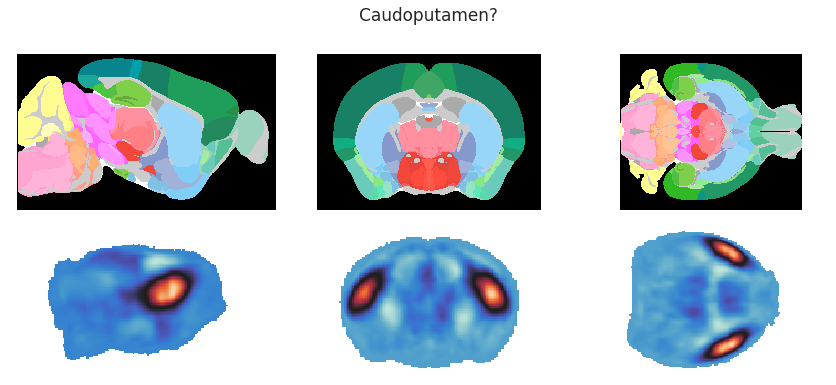

In [8]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 2
slices = [5900, 5000, 4000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Caudoputamen?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 3

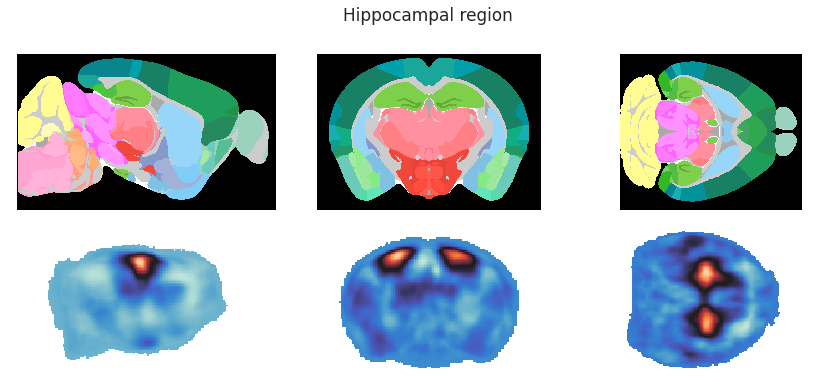

In [9]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 3
slices = [7000, 3000, 4000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Hippocampal region', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 4

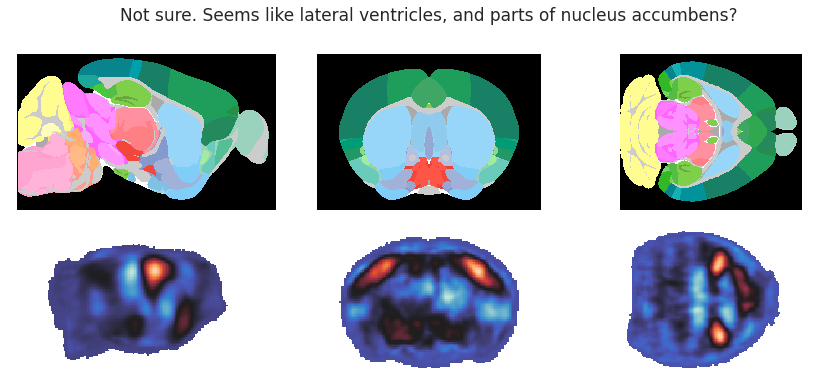

In [10]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 4
slices = [5000, 3000, 4000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Not sure. Seems like lateral ventricles, and parts of nucleus accumbens?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 5

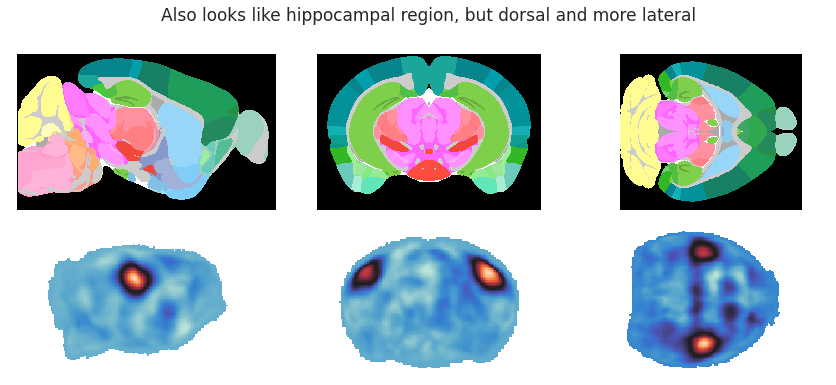

In [11]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 5
slices = [8000, 3000, 4000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Also looks like hippocampal region, but dorsal and more lateral', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 6

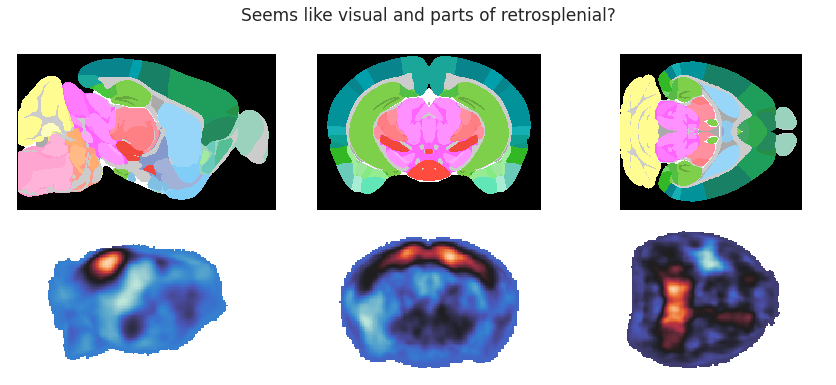

In [12]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 6
slices = [8000, 3000, 4000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Seems like visual and parts of retrosplenial?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 7

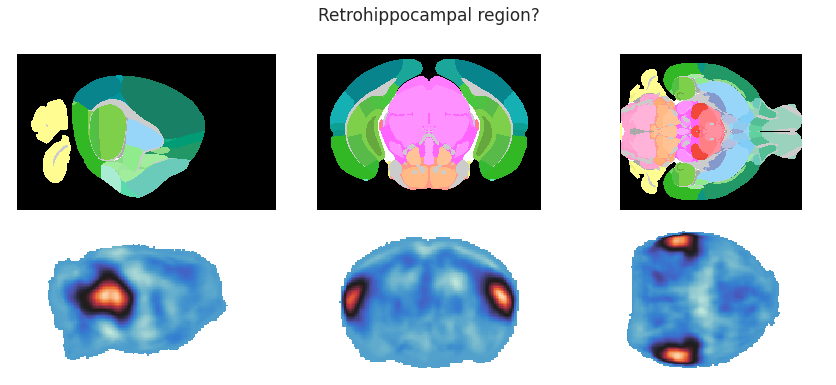

In [13]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 7
slices = [9000, 5000, 2000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Retrohippocampal region?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 8

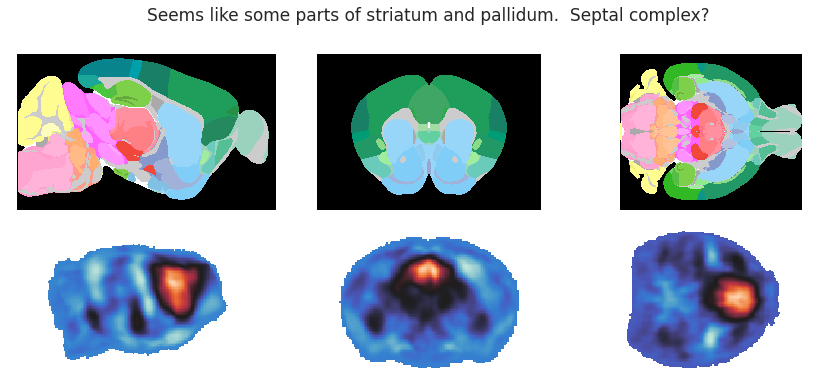

In [14]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 8
slices = [4000, 5000, 4000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Seems like some parts of striatum and pallidum.  Septal complex?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 9

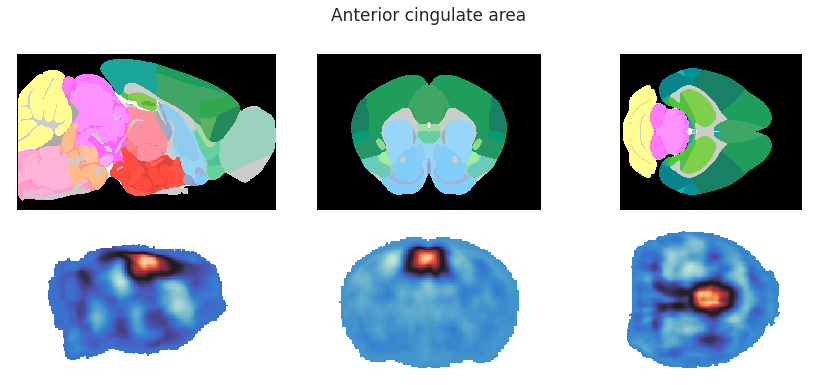

In [15]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 9
slices = [4000, 2000, 6000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Anterior cingulate area', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 10

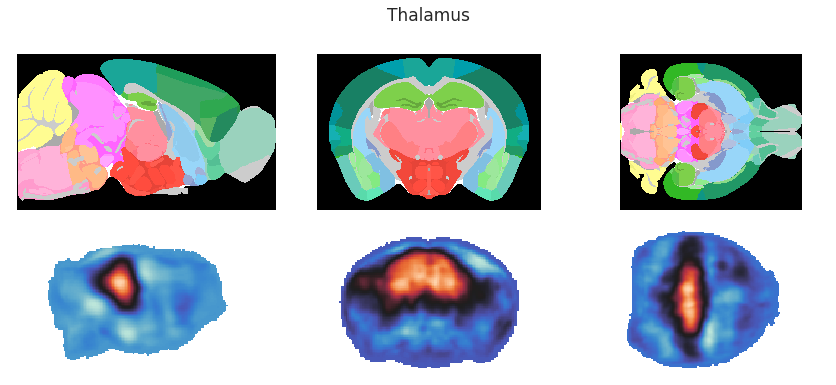

In [16]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 10
slices = [7000, 5000, 6000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Thalamus', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 11

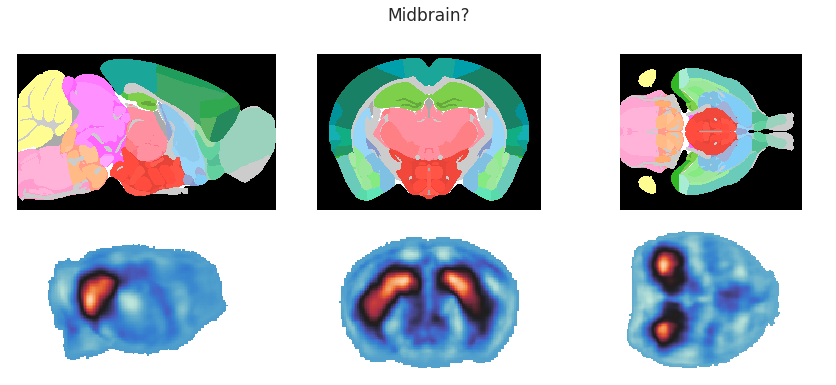

In [17]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 11
slices = [7000, 6000, 6000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Midbrain?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 12

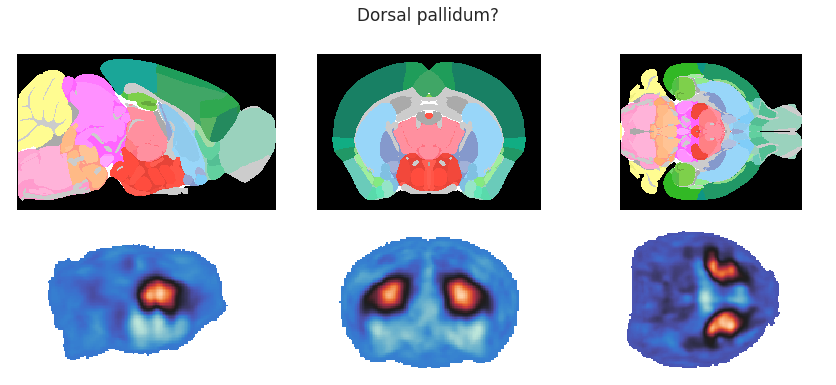

In [18]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 12
slices = [6000, 5000, 6000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Dorsal pallidum?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 13

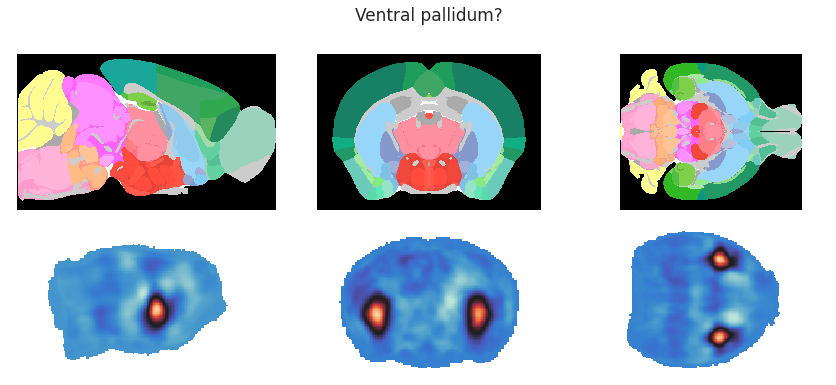

In [19]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 13
slices = [6000, 5000, 6000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Ventral pallidum?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 14

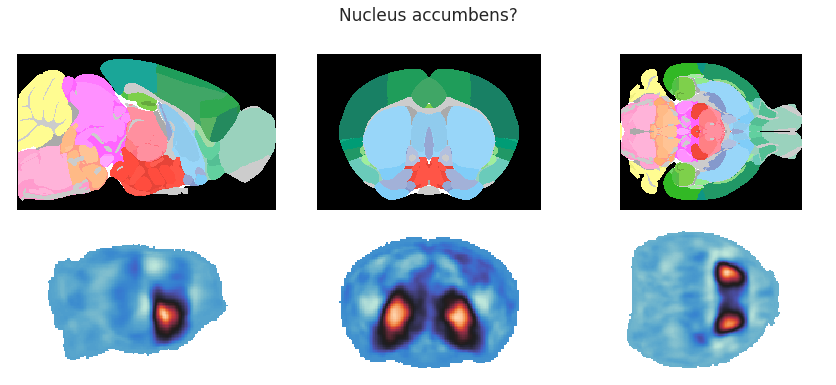

In [20]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 14
slices = [5000, 5000, 6000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Nucleus accumbens?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 15

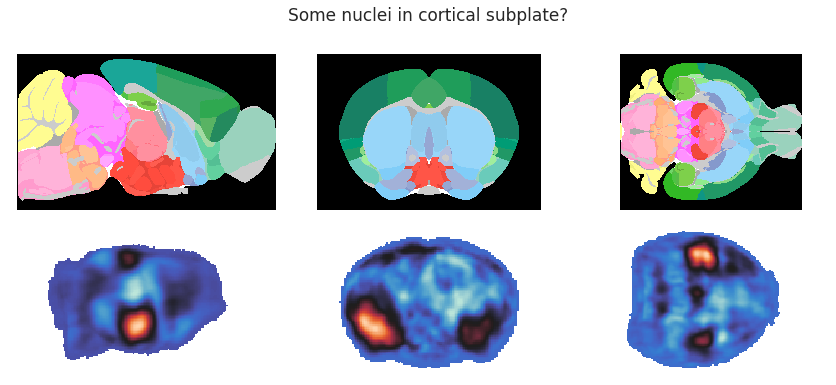

In [21]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 15
slices = [5000, 5000, 6000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Some nuclei in cortical subplate?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 16

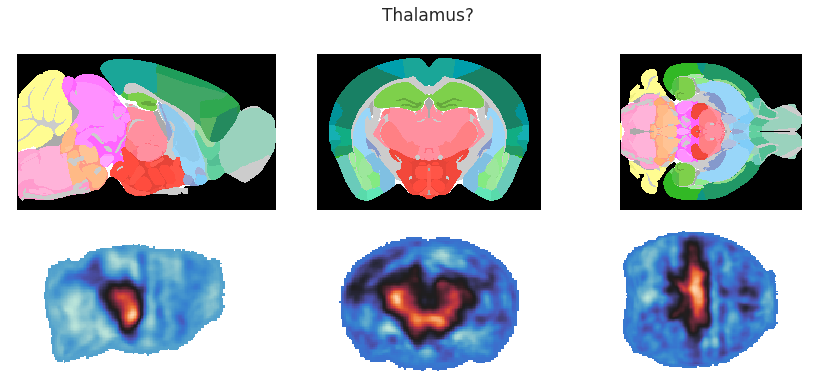

In [22]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 16
slices = [7000, 5000, 6000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Thalamus?', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()

### Component 17

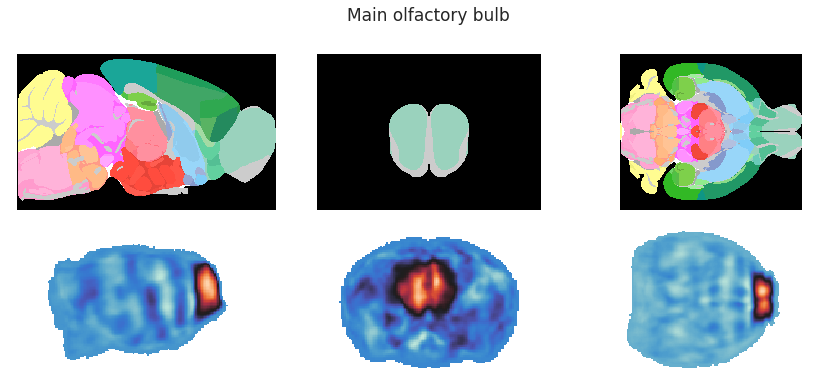

In [24]:
# HIDE CODE


fig, axes = create_figure(2, 3, (12, 5.2), width_ratios=[1., 1., 1])

component = 17
slices = [1000, 5000, 6000]

for i in range(3):
    # ARA
    x2plt = rsp.get_slice_image(i, slices[i])
    if i == 0:
        j = 1
    else:
        j = 0 if i == 2 else 2
        x2plt = np.transpose(x2plt, (1, 0, 2))[:, ::-1, :]
    axes[0, j].imshow(x2plt, interpolation='none')
    
    # ICA
    x2plt = x[..., component].mean(i)
    if i != 2:
        x2plt = x2plt[:, ::-1].T
    x2plt = np.ma.masked_where(x2plt == 0, x2plt)
    axes[1, i].imshow(x2plt, cmap='icefire')
fig.suptitle('Main olfactory bulb', fontsize=17, y=1.02)
remove_ticks(axes)
plt.show()